mean:  117363.57142857143
variance:  7910311327.6734705
mean1:  116935.0
variance1:  134553572.57142857
mean2:  117792.14285714286
variance2:  15685701735.836735


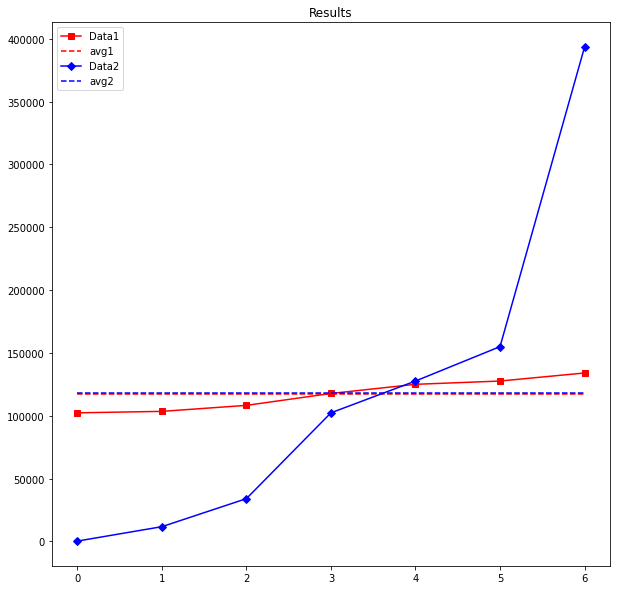

In [70]:
import numpy as np
import matplotlib.pyplot as plt
Data1 = [134045, 102343, 108279, 127634, 117738, 125018, 103488]
Data2 = [34045, 102343, 279, 127634, 11738, 155018, 393488]
Both = Data1+Data2
Both.sort()
Data1.sort()
Data2.sort()

# mean = np.mean(Both)
# variance = np.var(Both)
mean1 = np.mean(Data1)
variance1 = np.var(Data1)
# avg = sum(Data1) / len(Data1)
mean2 = np.mean(Data2)
variance2 = np.var(Data2)
print('mean: ',mean)
print('variance: ',variance)
print('mean1: ',mean1)
print('variance1: ',variance1)
print('mean2: ',mean2)
print('variance2: ',variance2)

plt.figure(figsize=(10,10))
# plt.plot(Data1+Data2,color='purple',marker='o', label='both sets')
plt.plot(Data1, color='red', marker='s', label='Data1')
plt.plot([mean1]*len(Data1), color='red', linestyle='--', label='avg1')
plt.plot(Data2, color='blue', marker='D', label='Data2')
plt.plot([mean2]*len(Data2), color='blue', linestyle='--', label='avg2')
plt.title('Results')

plt.legend()
plt.show()



[ 0.     2.375  4.5    6.375  8.     9.375 10.5   11.375 12.    12.375
 12.5   12.375 12.    11.375 10.5    9.375  8.     6.375  4.5    2.375]
max y:  12.5
max x:  2.5


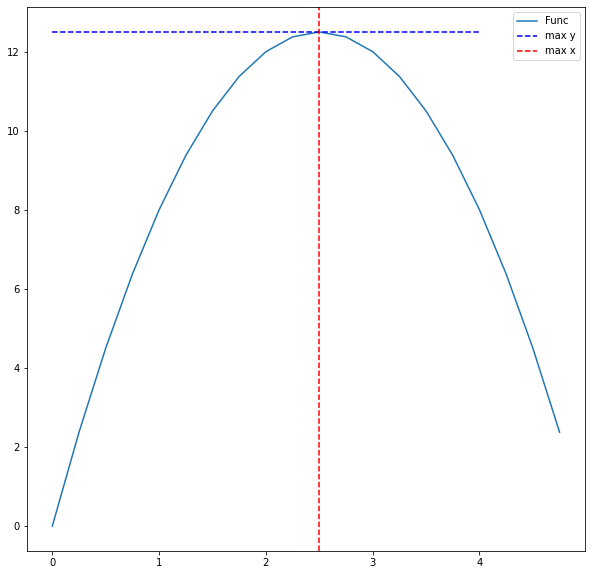

In [100]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0,5,0.25)
y = -2*x**2+10*x
maxy = y.max()
maxx = x[y.argmax()]
print(y)
print('max y: ', maxy)
print('max x: ', maxx)
plt.figure(figsize=(10,10))
plt.plot(x,y, label='Func')
plt.plot([maxy]*5, color='blue', linestyle='--', label='max y')
plt.axvline(maxx,0,maxy, color='red', linestyle='--', label='max x')
plt.legend()
plt.show()

N: 6
Cs: 2
Centroids: [[3.  1. ]
 [1.1 0.3]]
Distances: [[3.09515751 1.02956301]
 [3.60555128 1.42828569]]
Customers: [[3.  1. ]
 [3.4 1.2]
 [3.1 1.1]
 [1.4 0.6]
 [1.2 0.4]
 [1.1 0.3]]



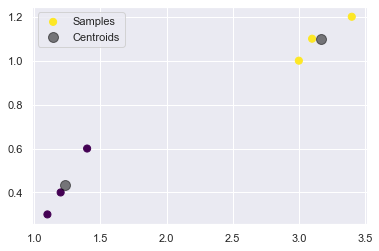

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

cust1= [3.0,1.0]
cust2= [3.4,1.2]
cust3= [3.1,1.1]
cust4= [1.4,0.6]
cust5= [1.2,0.4]
cust6= [1.1,0.3]

customers = np.array([cust1,cust2,cust3,cust4,cust5,cust6])
centroids = np.array([cust1,cust6])
N=len(customers)

def euclidean(customers, centroids):
    distances = np.empty([len(centroids),2])
    for i in range(0,len(centroids)):
        dist=np.sqrt(sum(pow(np.subtract(customers,centroids[i]),2)))
        # print(f'Distance[{i}]',dist)
        distances[i] = dist
    # print(distances)
    return distances

def draw_status(customers, centroids, clusters, plotnumber):
    plt.subplot(621+plotnumber)
    plt.scatter(customers[:,0],customers[:,1],label='Sample')
    plt.scatter(centroids[:,0],centroids[:,1], marker='s', color='orange', label='Centroids')
    plt.legend()
    plt.plot()
    # plt.show()

def kmeans(centroids, customers, K, plotresults=True):
    plt.figure(figsize=(20,20))
    distances = np.empty([N,K])
    new_centroids = np.empty([K,2])
    final_centroids = np.empty([K,2])
    clusters = np.empty(len(customers),dtype=np.int)

    for i in range(0,len(customers)):
        distances[i] = euclidean(customers,centroids)
        clusters[i] = np.argmin(distances[i])
        new_centroids[clusters[i]] += customers[i]
        divisor = np.bincount(clusters).astype(np.float)
        divisor.resize([K])
        for j in range(0,K):
            final_centroids[j] = np.nan_to_num(np.divide(new_centroids[j], divisor[j]))
        if (i>3 and plotresults ==True):
            draw_status(customers[:i], final_centroids, clusters[:i], i-3)
        return final_centroids

print('N:',N)
print('Cs:',len(centroids))
print('Centroids:',centroids)
print('Distances:',euclidean(customers,centroids))
# Print only 1st column
print('Customers:',customers)
print()
# test = euclidean(customers,centroids)

kmeans = KMeans(n_clusters=2)
kmeans.fit(customers)
y_kmeans = kmeans.predict(customers)

plt.scatter(customers[:,0],customers[:,1], c=y_kmeans, s=50, cmap='viridis', label='Samples')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5, label='Centroids')
# plt.scatter(Custx,Custy)
# draw_status(customers,centroids,2,0)
# draw_status(customers,centroids,2,1)
# draw_status(customers,centroids,2,2)
# plt.scatter(customers[:,0],customers[:,1],label='Sample')
# plt.scatter(centroids[:,0],centroids[:,1], marker='s', label='Centroids')

# finalcenters= kmeans(centroids, customers, 2, True)

plt.legend()
plt.show()

Question 5: K Means Clustering

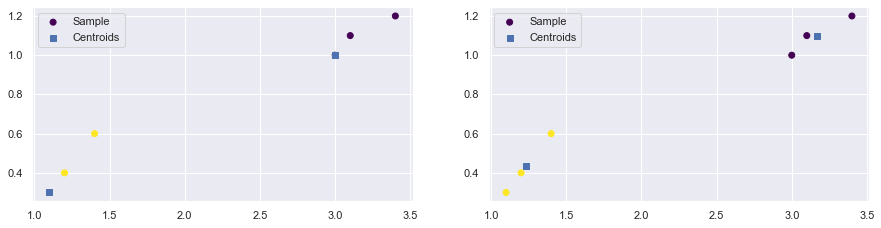

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin

cust1= [3.0,1.0]
cust2= [3.4,1.2]
cust3= [3.1,1.1]
cust4= [1.4,0.6]
cust5= [1.2,0.4]
cust6= [1.1,0.3]

customers = np.array([cust1,cust2,cust3,cust4,cust5,cust6])
centroids = np.array([cust1,cust6])
N=len(customers)
plt.figure(figsize=(15,25))

def draw_status(customers, centroids, clusters, plotnumber):
    plt.subplot(621+plotnumber)
    plt.scatter(customers[:,0],customers[:,1], c=clusters, cmap='viridis', label='Sample')
    plt.scatter(centroids[:,0],centroids[:,1], marker='s', label='Centroids')
    plt.legend()
    plt.plot()

def find_clusters(X, n_clusters):
    plotnumber = 0
    centers = centroids
    
    while True:
        # Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # Plot current state
        draw_status(customers,centers,labels,plotnumber)
        plotnumber += 1

        # Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
        
    return centers, labels

centers, labels = find_clusters(customers, 2)
# plt.subplot(623)
# plt.scatter(customers[:, 0], customers[:, 1], c=labels,
#             s=50, cmap='viridis', label='Samples')
# plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5, label='Centroids')
# plt.legend()
plt.show()